In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


def loaddata(filename):
    """
    加载数据集
    data: 原始数据集
    return: 特征数据x与标签类别数据y
    """
    dataSet = pd.read_table(filename, header=None)
    dataSet.columns = ['X1', 'X2', 'label']
    dataSet.insert(0, 'X0', 1)
    columns = [i for i in dataSet.columns if i != 'label']
    data_x = dataSet[columns]
    data_y = dataSet[['label']]
    return data_x, data_y


#sigmoid函数
def sigmoid(y):
    s = 1.0 / (1.0 + np.exp(-y))
    return s


def cost(xMat, weights, yMat):
    """
    计算损失函数
    xMat: 特征数据-矩阵
    weights: 参数
    yMat: 标签数据-矩阵
    return: 损失函数
    """
    m, n = xMat.shape
    hypothesis = sigmoid(np.dot(xMat, weights))  # 预测值
    cost = (-1.0 / m) * np.sum(yMat.T * np.log(hypothesis) +
                               (1 - yMat).T * np.log(1 - hypothesis))  # 损失函数
    return cost

In [2]:
def BGD_LR(data_x, data_y, alpha=0.1, maxepochs=10000, epsilon=1e-4):
    """
    使用批量梯度下降法BGD求解逻辑回归
    data_x: 特征数据
    data_y: 标签数据
    aplha: 步长，该值越大梯度下降幅度越大
    maxepochs: 最大迭代次数
    epsilon: 损失精度
    return: 模型参数
    """
    starttime = time.time()
    xMat = np.mat(data_x)
    yMat = np.mat(data_y)
    m, n = xMat.shape
    weights = np.ones((n, 1))  #初始化模型参数
    epochs_count = 0
    loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        loss = cost(xMat, weights, yMat)  #上一次损失值
        hypothesis = sigmoid(np.dot(xMat, weights))  #预测值
        error = hypothesis - yMat  #预测值与实际值误差
        grad = (1.0 / m) * np.dot(xMat.T, error)  #损失函数的梯度
        last_weights = weights  #上一轮迭代的参数
        weights = weights - alpha * grad  #参数更新
        loss_new = cost(xMat, weights, yMat)  #当前损失值
        if abs(loss_new - loss) < epsilon:  #终止条件
            break
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
    print(loss_new)
    print("批量梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epochs_count))
    plt.plot(epochs_list, loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights

0.17834203018273223
批量梯度下降算法耗时： 0.2085862159729004
迭代到第571次，结束迭代！


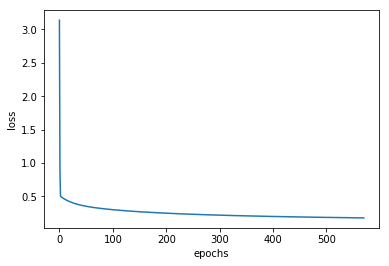

In [3]:
if __name__ == '__main__':
    data_x,data_y = loaddata('testSet.txt')
    weights_bgd = BGD_LR(data_x, data_y, alpha=0.1, maxepochs=10000, epsilon=1e-4)

In [4]:
def SGD_LR(data_x, data_y, alpha=0.1, maxepochs=10000, epsilon=1e-4):
    """
    使用SGD求解逻辑回归
    data_x: 特征数据
    data_y: 标签数据
    aplha: 步长，该值越大梯度下降幅度越大
    maxepochs: 最大迭代次数
    epsilon: 损失精度
    return: 模型参数
    """
    starttime = time.time()
    xMat = np.mat(data_x)
    yMat = np.mat(data_y)
    m, n = xMat.shape
    weights = np.ones((n, 1))  # 模型参数
    epochs_count = 0
    loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        rand_i = np.random.randint(m)  # 随机取一个样本
        loss = cost(xMat, weights, yMat)  #前一次迭代的损失值
        hypothesis = sigmoid(np.dot(xMat[rand_i, :], weights))  #预测值
        error = hypothesis - yMat[rand_i, :]  #预测值与实际值误差
        grad = np.dot(xMat[rand_i, :].T, error)  #损失函数的梯度
        weights = weights - alpha * grad  #参数更新
        loss_new = cost(xMat, weights, yMat)  #当前迭代的损失值
        if abs(loss_new - loss) < epsilon:
            break
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
    print(loss_new)
    print("随机梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epochs_count))
    plt.plot(epochs_list, loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights

1.0779702353388714
随机梯度下降算法耗时： 0.012961864471435547
迭代到第26次，结束迭代！


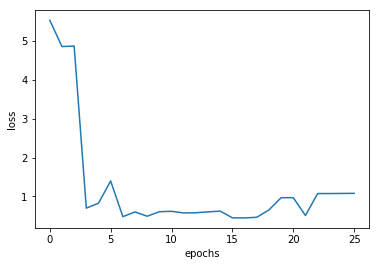

In [5]:
if __name__ == '__main__':
    data_x, data_y = loaddata('testSet.txt')
    weights_sgd = SGD_LR(data_x,
                         data_y,
                         alpha=0.1,
                         maxepochs=10000,
                         epsilon=1e-4)

0.43091387327336306
小批量梯度下降算法耗时： 0.01096796989440918
迭代到第18次，结束迭代！


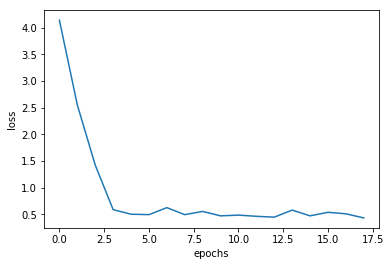

In [6]:
def MBGD_LR(data_x,
            data_y,
            alpha=0.1,
            batch_size=10,
            maxepochs=10000,
            epsilon=1e-4):
    """
    使用MBGD求解逻辑回归
    data_x: 特征数据
    data_y: 标签数据
    aplha: 步长，该值越大梯度下降幅度越大
    maxepochs: 最大迭代次数
    epsilon: 损失精度
    return: 模型参数
    """
    starttime = time.time()
    xMat = np.mat(data_x)
    yMat = np.mat(data_y)
    m, n = xMat.shape
    weights = np.ones((n, 1))  # 模型参数
    epochs_count = 0
    loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        randIndex = np.random.choice(range(len(xMat)),
                                     batch_size,
                                     replace=False)
        loss = cost(xMat, weights, yMat)  #前一次迭代的损失值
        hypothesis = sigmoid(np.dot(xMat[randIndex], weights))  #预测值
        error = hypothesis - yMat[randIndex]  #预测值与实际值误差
        grad = (1.0 / batch_size) * np.dot(xMat[randIndex].T, error)  #损失函数的梯度
        weights = weights - alpha * grad  #参数更新
        loss_new = cost(xMat, weights, yMat)  #当前迭代的损失值
        if abs(loss_new - loss) < epsilon:
            break
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
    print(loss_new)
    print("小批量梯度下降算法耗时：", time.time() - starttime)
    print('迭代到第{}次，结束迭代！'.format(epochs_count))
    plt.plot(epochs_list, loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights


if __name__ == '__main__':
    data_x, data_y = loaddata('testSet.txt')
    weights_mbgd = MBGD_LR(data_x,
                           data_y,
                           alpha=0.1,
                           batch_size=3,
                           maxepochs=10000,
                           epsilon=1e-4)

0.17834203018273223
批量梯度下降算法耗时： 0.37604212760925293
迭代到第571次，结束迭代！


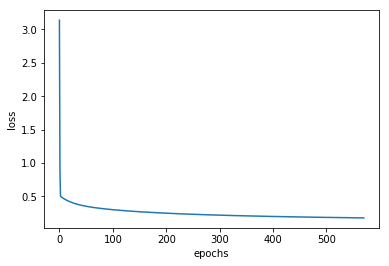

1.1357600393393794
随机梯度下降算法耗时： 0.07300329208374023
迭代到第77次，结束迭代！


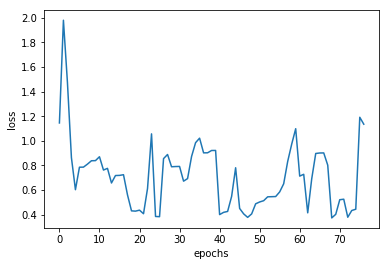

0.20485180443221765
小批量梯度下降算法耗时： 0.12168574333190918
迭代到第345次，结束迭代！


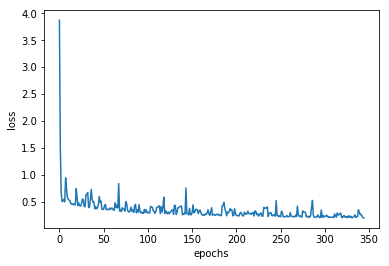

In [7]:
if __name__ == '__main__':
    data_x, data_y = loaddata('testSet.txt')
    weights_bgd = BGD_LR(data_x,
                         data_y,
                         alpha=0.1,
                         maxepochs=10000,
                         epsilon=1e-4)
    weights_sgd = SGD_LR(data_x,
                         data_y,
                         alpha=0.1,
                         maxepochs=10000,
                         epsilon=1e-4)
    weights_mbgd = MBGD_LR(data_x,
                           data_y,
                           alpha=0.1,
                           batch_size=3,
                           maxepochs=10000,
                           epsilon=1e-4)

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt


def load_data():
    names = [
        'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'
    ]
    # loading training data
    path = 'iris_data.txt'
    df = pd.read_csv(path, header=None, names=names)
    # print df.head()
    x = np.array(df.iloc[:, 0:4])
    y = np.array(df['class'])

    print(x.shape, y.shape)
    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40)
    return train_test_split(x, y, test_size=0.33, random_state=40)

In [9]:
def predict():
    x_train, x_test, y_train, y_test = load_data()
    k = 5
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    print(accuracy_score(y_test, pred))

In [10]:
def cross_validation():
    x_train, x_test, y_train, y_test = load_data()
    k_lst = list(range(1, 30))
    lst_scores = []

    for k in k_lst:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn,
                                 x_train,
                                 y_train,
                                 cv=4,
                                 scoring='accuracy')
        lst_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in lst_scores]
    optimal_k = k_lst[MSE.index(min(MSE))]
    print("The optimal number of neighbors is %d" % optimal_k)
    # plot misclassification error vs k
    # plt.plot(k_lst, MSE)
    # plt.ylabel('Misclassification Error')
    plt.plot(k_lst, lst_scores)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('correct classification rate')
    plt.show()

(150, 4) (150,)
The optimal number of neighbors is 5


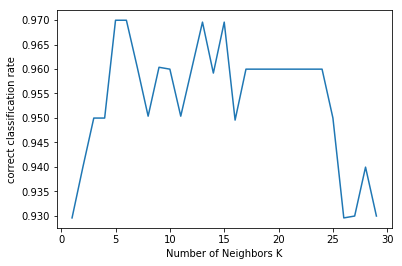

(150, 4) (150,)
0.94


In [11]:
cross_validation()
predict()